In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from shapegen import *

# Computational Exercise 3: Gauss's Law

In this exercise, we'll use computational methods to look at the shape independence of Gauss's Law. Please create markdown cells as needed to include your answers to the questions in your notebook. To to this, click the `+` icon near the top-left of the notebook to add a cell directly below the currently selected cell. Next, open the `Code` dropdown menu and change it to `Markdown`. Now when you run the cell, it should render as regular text (like this one).  

## Overview

The purpose of this exercise is to look at how Gauss's law is independent of surface shape, and to visualize the electric field over these shapes. There are three sections:
* Calculating the flux from a given $Q_{enc}$ over a sphere
* Calculating the flux from a given $Q_{enc}$ over a rectangular prism
* Calculating the flux from a given $Q_{enc}$ over a cylinder

__To calculate the flux, you'll use a numerical integration technique.__ In a normal flux calculation, you'd use $\phi = \oint_S  \mathbf{E} ⋅ d \mathbf{a}$, which is essentially a sum over infinitely small areas. To do a numerical integration, we look at the flux through a given face of the object, and sum all of those to get an approximation of the flux, so the equation would look like $\phi \approx \sum_{i=1}^{n} \mathbf{E}_i ⋅ \mathbf{A}_i$.

## Helpful Information

__This exercises relies on a package called shapegen, which was written specifically to make this exercise much, much easier.__ It handles all of the computationally-annoying parts of this, like turning different shapes into a bunch of triangles, giving you the areas and locations of those triangles, and (the icing on the cake) plotting these triangularized shapes. For full documentation, there should be a file, shapgen.html, with all of the information included posted in your class documents. You're also welcome to open shapegen.py in a text editor and take a look!

This package uses what's known as an object-oriented programming methodology, where you make an instance of an object that has certain attributes and functions attached to it. For example, you could make a Number object which has the attribute value and the functions add and subtract. To create the object, you would use
<code>n = Number(1)</code> to declare a Number object with the value <code>1</code>. Then <code>n.value</code> would return 1, and <code>n.add(2)</code> would make <code>n = 3</code>. Note that to get an attribute there are no parentheses and for a function call there are, whether or not that function takes an argument. For more information on object-oriented programming, try taking CSC-207.

### Declaring a Shape Object
To generate a sphere, you can use:
<pre><code>s = Sphere(r, res=n)</code></pre>
Where `r` is the radius of the sphere and n is the resolution used to generate it. The resolution is optional (known as a keyword argument), and defaults to 16, so <code>c = Sphere(r)</code> works just as well.

For a rectangular prism, use:
<pre><code>p = Prism(corner_pt, res=n)</code></pre>
Where `corner_pt` is the location of one of the corners of the prism. So to make a 2x2x2 cube, the declaration would be<code>p = Prism((1, 1, 1))</code>. Note that the prism will be centered at the origin, so make sure none of the coordinate entries are 0.

For a cylinder, use:
<pre><code>c = Cylinder(r, l, res=n)</code></pre>
Where `r` is the radius and `l` is the length.

## Getting Areas and Locations

Since you'll be summing over the surface of each object, you'll need to get the location and area of each surface face (or Tile, in the package). For any object, __use the function calls <code>areas = shape_name.get_areas()</code> and <code>centroids = shape_name.get_centroids()</code>__ to get a list of the areas and centroids, respectively.

Each area is given as a normal vector of the form $(x, y, z)$, and each centroid is given as a position vector of the same form. The area vector is a vector that points normal to the surface face and has a magnitude equal to the area of the face. By giving these to you as an vector, you can take the dot product of the area with a field and get the flux travelling normal to the face. This shows up often in the vector calculus that Griffiths uses.

### Dealing with Vector Math with numpy

The numpy (np) package in python has a number of useful tools to help you handle vectors. You can absolutely finish this assignment without doing vector math (you can unpack each element of any vector just like any array), but it'll be much, much easier if you use vectors. Trust me, I tried.

Some useful vector operations:
* [np.subtract](https://numpy.org/doc/stable/reference/generated/numpy.subtract.html): Find the difference (separation vector) between two vectors
* [np.linalg.norm](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html): Find the magnitude of a vector
* [np.dot](https://numpy.org/doc/stable/reference/generated/numpy.dot.html): Take the dot product of two vectors
* [np.cross](https://numpy.org/doc/stable/reference/generated/numpy.cross.html): Take the cross product of two vectors

Also, remember that you can find a unit vector by dividing a given vector by its magnitude.

## Plotting the Shapes
To plot a shape, you can use code such as:
<pre><code>ax = shape_name.plot(color=e, cmap='plasma')
ax.set_title("Sample plot")
plt.show()
</code></pre>
The `shape_name.plot()` function returns an Axis object, so that you can add your own titles, axis limits, and use other plotting functions.

Note that color and cmap are both keyword arguments, so you can leave them out if you just want to plot the object. __The color argument takes an array of values of length <code>shape_name.len</code>.__ You should get this array by iterating through while calculating the fluxes (which will also have the same length). The cmap argumemt takes a [colormap](https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html), or will just default to plasma.

# a) Calculating the Electric Field

__First, use the template code below make a function that returns the electric field from a point charge at a given location.__ This function should take as inputs the magnitude of the charge `q`, the location of the charge `q_loc1` as a position vector of the form `(x, y, z)`, and the point of interest, also a position vector `r0`. Think about Griffith's equation for the electric field vector (eq. 1.3, excluding the summation, which we'll deal with separately):
$$
\begin{aligned}
\mathbf{E}(\mathbf{r}) = \frac{1}{4 \pi \epsilon_{0}} \frac{q}{\mathscr{r}^2} \hat{\mathscr{r}}
\end{aligned}
$$

Since we're taking all of our inputs as vectors, you'll have an easier time if you use numpy vector functions. The function should return $\mathbf{E}$ as a vector of the form $(E_x, E_y, E_z)$ 

In [2]:
def get_E(q, q_loc, r0):
    """Return the electric field vector E=(Ex,Ey,Ez) due to charge 
        q at r0."""
    e_0 = 1 #Put the permitivitty of free space constant here
    
###YOUR CODE FOR FINDING THE E-Field HERE

#/   
    e_0 = 8.85 * 10**-12 #Coulomb's constant in Nm^2/C^2
    
    sep = np.subtract(r0, q_loc) #Find separation vector
    mag = np.linalg.norm(sep) #Magnitude of separation vector
    norm_sep = sep/mag #Separation unit vector
    
    #Calculate E
    E = (q / (mag**2)) * norm_sep / (4 * np.pi * e_0)
#/
    return E


# b) Predict Total Flux from a Charge

In order to test your code, you'll want to know what the total flux through the Gaussian surface should be for a given charge. Use the cell below to calculate that prediction. Then in parts c, d, and e, you can sum the flux through the surface and compare with your prediction.

In [3]:
# Declare info about q
q_enc = 1 # Charge of q
q_loc = (0, 0, 0) #L ocation of q

###YOUR CODE FOR FINDING THE TOTAL FLUX THROUGH A SURFACE FROM THIS CHARGE

flux = 1 # Fix

#/

e_0 = 8.85 * 10**-12 #Coulomb's constant in Nm^2/C^2
flux = q_enc/e_0

#/

print("Total predicted flux: {:.3e} N m^2/C".format(flux))

Total predicted flux: 1.130e+11 N m^2/C


# c) Flux Through a Sphere
Now that we have a function for the E-field, you can use it to find the flux of that electric field through a gaussian surface. 

__Use the next block to:__
* __Create the sphere object and get the areas and centroids__
* __Iterate through those to find the total flux and a list of the E-field on each surface face__
* __Print the total flux__
* __Plot the sphere using the E-fields to color the faces__.

*Once you've done this, you can check your answer by calculating the flux over the surface by hand.*

*I encourage you to try changing the size or dimensions of the sphere, the location of the enclosed charge, and the resolution of shapegen. You might even try putting the charge outside of the sphere! As you do so, notice how the flux at the surface does or doesn't change.*

Total flux: 1.130e+11 N m^2/C


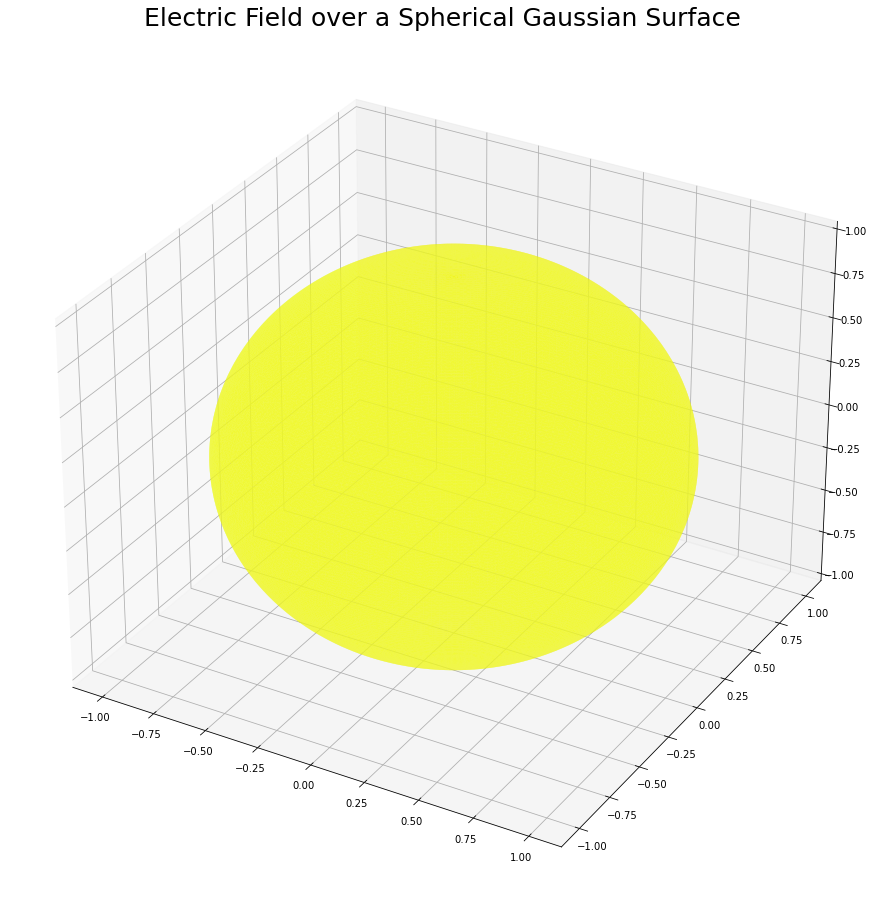

In [4]:
# Generate sphere object
r = 1 #Radius
s = Sphere(r, res = 200)

# Get areas and locations of each triangle
areas = s.get_areas()
centroids = s.get_centroids()

# Dummy definitions of numpy arrays containing the fluxes and magnitude of the E-fields
fluxes = np.zeros(s.len) #array of zeros with same length as number of triangles
mag_efields = np.zeros(s.len) 

###YOUR CODE FOR FINDING E-Field AND FLUX HERE

#/

# Find E fields and fluxes


for i in range(s.len):
    E = get_E(q_enc, q_loc, centroids[i])
    fluxes[i] = np.dot(areas[i], E)
    mag_efields[i] = np.linalg.norm(E)
#/    
    
# Calculate Total Flux
flux = np.sum(fluxes)

print("Total flux: {:.3e} N m^2/C".format(flux))

# Plot using magnitude of E-fields, since triangles have different areas
ax = s.plot(color=np.array(mag_efields), cmap='plasma')
ax.set_title("Electric Field over a Spherical Gaussian Surface",
            fontsize=25)

plt.show()


# d) Flux Through a Cube

__Repeat part (c) but this time for a cube (prism).__ Note how the flux through the cube compares with the previously calculated flux through a sphere.

*Once again, I encourage you to try changing the size or dimensions of the cube, the location of the enclosed charge, and the resolution of shapegen. As you do so, notice how the flux at the surface does or doesn't change.*

Total flux: 1.130e+11 N m^2/C


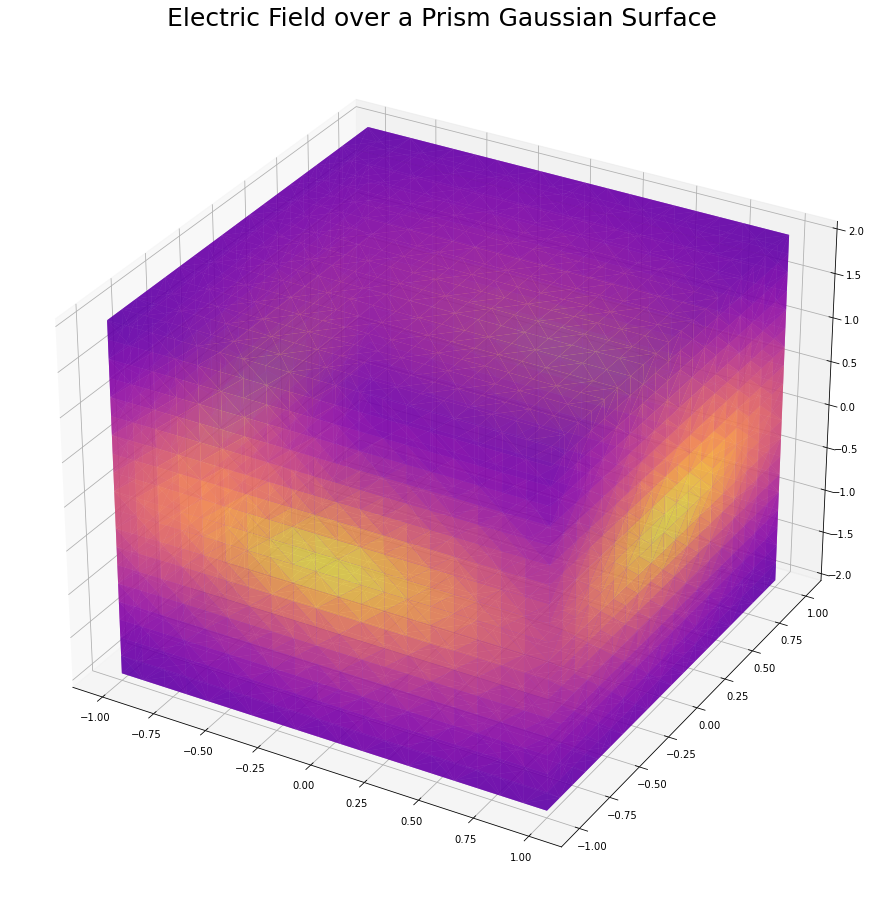

In [5]:
# Generate prism Object
corner_pt = (1, 1, 2)
p = Prism(corner_pt,res = 20)

###YOUR CODE FOR FINDING AND PLOTTING E-Field AND FLUX HERE

#/
#Get areas and locations of each triangle
areas = p.get_areas()
centroids = p.get_centroids()

#Find E fields and fluxes
fluxes = np.zeros(p.len) #array of zeros with same length as number of triangles
mag_efields = np.zeros(p.len) 

for i in range(p.len):
    E = get_E(q_enc, q_loc, centroids[i])
    fluxes[i] = np.dot(areas[i], E)
    mag_efields[i] = np.linalg.norm(E)
    
flux = np.sum(fluxes)

print("Total flux: {:.3e} N m^2/C".format(flux))

#Plot using E-fields, since triangles have different areas
ax = p.plot(color=np.array(mag_efields), cmap='plasma')
ax.set_title("Electric Field over a Prism Gaussian Surface",
            fontsize=25)

plt.show()
#/

# e) Flux Through a Cylinder

__Repeat the steps in part (c) and (d) but this time for a cylinder.__ Note how the flux through the cylinder compares with the previously calculated flux through a sphere and cube.

*Once again, I encourage you to try changing the size or dimensions of the cylinder, the location of the enclosed charge, and the resolution of shapegen. As you do so, notice how the flux at the surface does or doesn't change.*

Total flux: 1.128e+11 N m^2/C


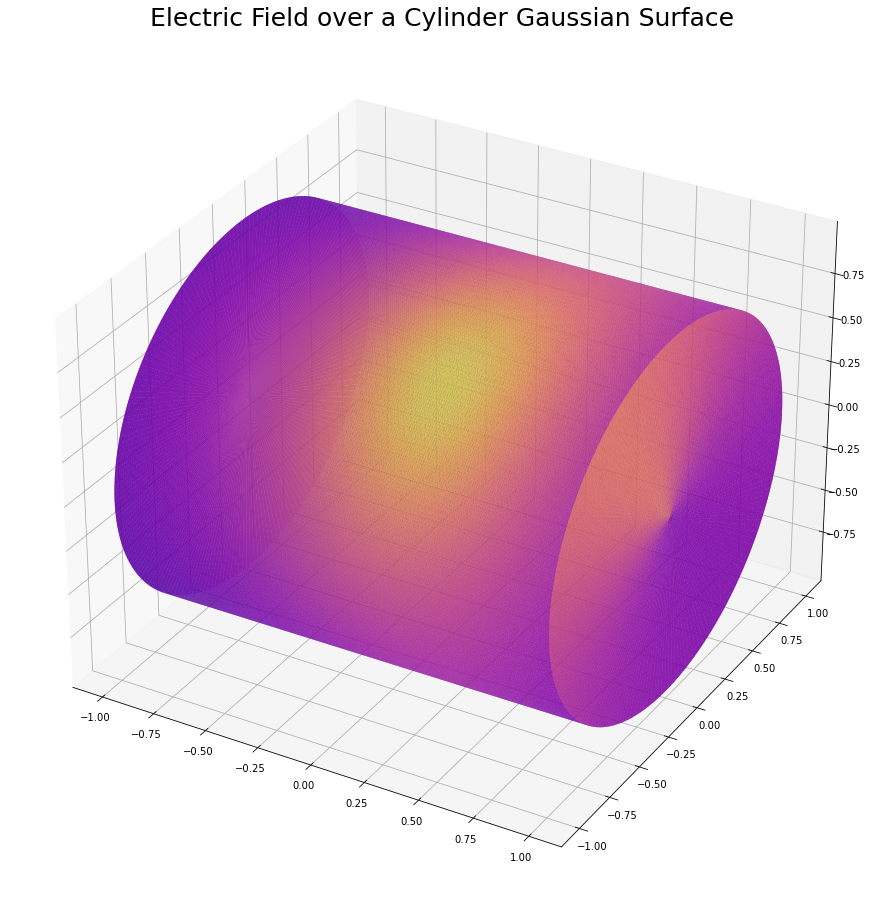

In [6]:
r = 1 #Radius
l = 4 #Length

c = Cylinder(l, r)

###YOUR CODE FOR FINDING AND PLOTTING E-Field AND FLUX HERE

#/
#Declare info about q
q_enc = 1
q_loc = (0.3, -0.2, 0.3)

#Generate Cylinder Object
r = 1
l = 2
c = Cylinder(r, l, res=200)

#Get areas and locations of each triangle
areas = c.get_areas()
centroids = c.get_centroids()

#Find E fields and fluxes
fluxes = np.zeros(c.len) #array of zeros with same length as number of triangles
mag_efields = np.zeros(c.len) 

for i in range(c.len):
    E = get_E(q_enc, q_loc, centroids[i])
    fluxes[i] = np.dot(areas[i], E)
    mag_efields[i] = np.linalg.norm(E)

#Calculate total flux
flux = np.sum(fluxes)

print("Total flux: {:.3e} N m^2/C".format(flux))

#Plot using E-fields, since triangles have different areas
ax = c.plot(color=np.array(mag_efields), cmap='plasma')
ax.set_title("Electric Field over a Cylinder Gaussian Surface",
            fontsize=25)

plt.show()
#/